In [5]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import seaborn as sns
from datetime import date
from datetime import timedelta
import calendar

In [6]:
str1 = "/home/satyam/THESIS/SST/sst.day.mean.2010.nc"
area = xr.open_mfdataset(str1)
area

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-12-31
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(365, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.5
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    institution:    NOAA/NCDC
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment:        Reynolds, et al., 2007: Daily High-Resolution-Blended Ana...
    history:        Thu Aug 24 13:49:55 2017: ncatted -O -a References,global...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....

In [7]:


def make_figure():
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

#     generate a basemap with country borders, oceans and coastlines
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle='dotted')
    return fig, ax



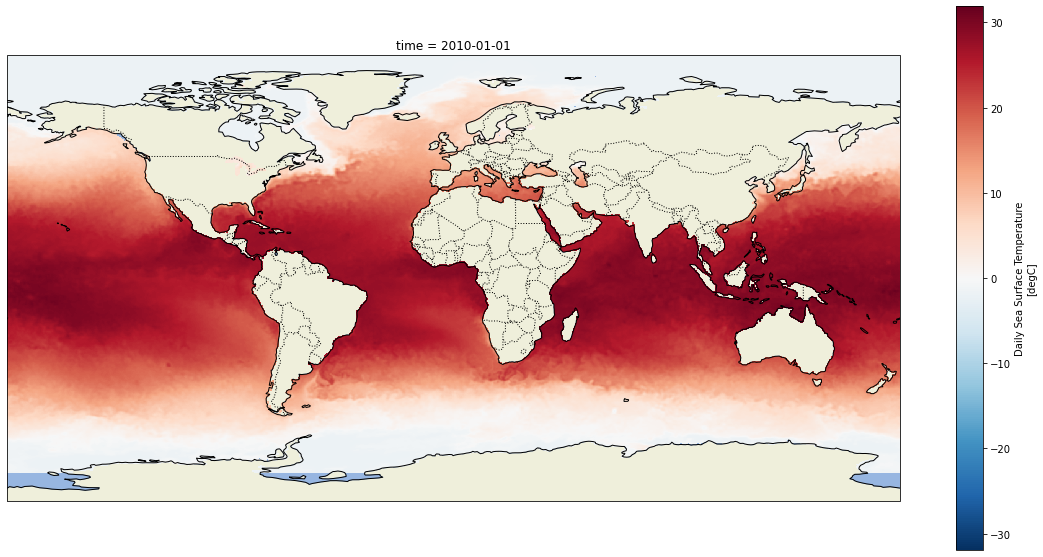

In [8]:


_, ax = make_figure()
grid = area.isel(time=0).sst
grid.plot(ax=ax, transform=ccrs.PlateCarree())



In [9]:
fig, ax = make_figure()

frames = area.time.size                   # Number of frames
min_value = float(area.sst.min().values)  # Lowest value
max_value = float(area.sst.max().values)  # Highest value

def draw(frame, add_colorbar):
    grid = area.isel(time=frame).sst
    contour = grid.plot(ax=ax, transform=ccrs.PlateCarree(),add_colorbar=add_colorbar, vmin=min_value, vmax=max_value ,cmap = "coolwarm")
    title = "Time - " + str(grid.time.values)
    ax.set_title(title)
    return contour


def init():
    return draw(0, add_colorbar=True)


def animate(frame):
    return draw(frame, add_colorbar=False)


ani = animation.FuncAnimation(fig, animate, frames, interval=0.01, blit=False,init_func=init, repeat=False)
plt.close(fig)

In [ ]:
ani.save('sst.mp4', writer=animation.FFMpegWriter(fps=5))
